<a href="https://colab.research.google.com/github/Sergius-DS/Proyecto_churn/blob/main/BETA_Classification_Churn_v2_Sergio_Rivera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJETIVO**

Se busca utilizando la Ciencia de Datos, identificar características que influyan en la deserción de clientes(Churning), así también con los datos obtenidos ver si se puede obtener revelaciones de cómo optimizar el servicio existente.

**CONTEXTO**

En un mundo cada vez más demandante y con muchas opciones, la deserción de clientes es más común ya sea por factores económicos, mal servicio, falta de educación financiera, desconocimiento de todos los servicios a los que se puede optar o falta de interacción cliente-compañía, podrían ser causantes de la deserción.

Se va a buscar revelaciones que puedan confirmar a través de los datos qué características influyen en esta acción.

**DATOS GENERALES**

El dataset proporcionado '**Credit_card_churn.xlsx**' obtenido de "Kaggle" cuenta con 10.127 filas y 23 columnas lo que propociona una buena cantidad datos para hacer un análisis.

El set de datos brinda información relacionada a la deserción de clientes, como edad de los clientes ya sean existentes o que abandonaron, límite de crédito, saldo final, tipo de educación, si han sido contactados en los últimos 12 meses, etc.

Se va a explorar el set de datos, se van a hacer análisis, plantear preguntas relacionadas al objetivo y obteniendo respuestas de los datos presentes en el data set para hacer frente a la deserción de clientes.


**ESTRUCTURA DEL SET DE DATOS**

 **CLIENTNUM:** es un identicador único del tipo numérico.

 **Attrition_Flag:** es del tipo string que consta de 2 categorías ['Existing Customer' 'Attrited Customer'] ['Cliente Existente' 'Cliente Desertado']

 **Customer_Age:** La edad de los clientes es del tipo numérico.

 **Gender:** es del tipo string que consta de 2 categorías ['M' 'F'] para Masculino y Femenino

 **Dependent_count:** es del tipo numérico y muestra la cantidad de personas que dependen del cliente, hijos, familiares.

 **Education_Level:** es del tipo string que consta de ['High School':Liceo, 'Graduate':Graduado, 'Uneducated':Sin Educación, 'Unknown': Desconocido, 'College':Universidad, 'Post-Graduate':Magister,
 'Doctorate':Doctorado] mostrando los niveles de educación de los clientes

 **Marital_Status:** es del tipo string que consta de ['Married' 'Single' 'Unknown' 'Divorced'] ['Casado/a' 'Soltero/a' 'Desconocido' 'Divorciado/a']

 **Income_Category:** es del tipo string que consta de ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] rangos de sueldo y una categoría Desconocido

 **Card_Category:** es del tipo string que consta de categorías de tarjetas de Crédito['Blue' 'Gold' 'Silver' 'Platinum']

 **Months_on_book:** es del tipo numérico y refleja la cantidad de meses que el cliente lleva en la compañía

 **Total_Relationship_Count:** es del tipo numérico y refleja la cantidad de servicios el cliente tiene con la compañía

 **Months_Inactive_12_mon:** es del tipo numérico y refleja la cantidad de meses que el cliente ha estado inactivo durante los últimos 12 meses

 **Contacts_Count_12_mon:** es del tipo numérico y refleja la cantidad de clientes o instituciones con los que el cliente tuvo contacto dentro de los últimos 12 meses

 **Credit_Limit:** es del tipo flotante y muestra el Límite de Crédito del cliente

 **Total_Revolving_Bal:** es del tipo numérico y muestra la cantidad de dinero que el cliente debe a la compañía

 **Avg_Open_To_Buy:** es del tipo flotante y muestra la cantidad de dinero que el cliente tiene disponible para hacer compras

 **Total_Amt_Chng_Q4_Q1:** muestra el cambio de la cantidad del cuarto al primer trimestre **falta limpiar esa columna**. ver eso está como object

 **Total_Trans_Amt:** es del tipo numérico y refleja el dinero total en las transacciones realizadas

 **Total_Trans_Ct:** es del tipo numérico y refleja la cantidad de dinero que aumentó debido a las transacciones realizadas

 **Total_Ct_Chng_Q4_Q1:** es del tipo numérico y refleja la cantidad de transacciones que aumentaron desde el primer al cuarto trimestre

 **Avg_Utilization_Ratio:** es del tipo flotante y muestra la razón el porcentaje de cuánto un cliente utilizó los servicios ofrecidos

   **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:** es del tipo flotante, se observa que se usó el Clasificador Naives Bayes, pero no se sabe cómo fue usado en qué variables, si se hizo Data Wrangling, si se normalizaron los datos. En general no se sabe si la metodología está bien aplicada

   **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2:** es del tipo flotante,  se observa que se usó el Clasificador Naives Bayes, pero no se sabe cómo fue usado en qué variables, si se hizo Data Wrangling, si se normalizaron los datos. En general no se sabe si la metodología está bien aplicada


# ANALISIS EXPLORATORIO DE DATOS (E.D.A)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('Credit_card_churn.xlsx')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1335,1144,42,1625,61.00,0.93448,99991.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1541,1291,33,3714,105.00,0.56861,99994.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2594,1887,20,2333,0.00,0.21081,99998.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1405,1171,20,2333,0.76,13366.00000,99987.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2175,816,28,2024-05-02 00:00:00,0.00,0.21676,99998.0


In [4]:
print(df.shape)

(10127, 23)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,247.333503,27137.184116,100215.496101
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,274.452904,32749.533730,73990.590330
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000,0.000029,0.010000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.060000,0.989830,99965.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,132.000000,16471.000000,99983.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,463.000000,31726.000000,99993.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,999.000000,99958.000000,499338.000000


In [7]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

VALORES DUPLICADOS

In [8]:
print(df.duplicated().sum())

0


COLUMNAS CATEGÓRICAS

In [9]:
print(df.columns[df.dtypes == 'object'])

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1'],
      dtype='object')


COLUMNAS NUMÉRICAS

In [10]:
print(df.columns[df.dtypes != 'object'])

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [11]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [13]:
df['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [14]:
df['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [15]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [16]:
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [17]:
assert df['Total_Amt_Chng_Q4_Q1'].dtype == 'object'

CORRECIÓN DE CATEGORÍAS

In [18]:
# Create a sample DataFrame with a datetime column
data = df['Total_Amt_Chng_Q4_Q1']
dffecha = pd.DataFrame(data)

# Iterate through rows and find the index of rows with datetime type
for index, row in dffecha.iterrows():
    if isinstance(row['Total_Amt_Chng_Q4_Q1'], pd.Timestamp):
        dffecha.loc[index, 'Total_Amt_Chng_Q4_Q1'] = np.nan
        #print(f"Row with index {index} is of datetime type.")

In [19]:
dffecha.isna().sum()

Total_Amt_Chng_Q4_Q1    57
dtype: int64

In [20]:
dffecha['Total_Amt_Chng_Q4_Q1'] = pd.to_numeric(dffecha['Total_Amt_Chng_Q4_Q1'])
dffecha['Total_Amt_Chng_Q4_Q1'].fillna(value=dffecha['Total_Amt_Chng_Q4_Q1'].mean(), inplace=True)
df['Total_Amt_Chng_Q4_Q1'] = dffecha['Total_Amt_Chng_Q4_Q1']

In [21]:
df['Total_Amt_Chng_Q4_Q1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: Total_Amt_Chng_Q4_Q1
Non-Null Count  Dtype  
--------------  -----  
10127 non-null  float64
dtypes: float64(1)
memory usage: 79.2 KB


In [22]:
# Create a sample DataFrame with a datetime column
data2 = df['Total_Ct_Chng_Q4_Q1']
dffecha2 = pd.DataFrame(data2)

# Iterate through rows and find the index of rows with datetime type
for index, row in dffecha2.iterrows():
    if isinstance(row['Total_Ct_Chng_Q4_Q1'], pd.Timestamp):
        dffecha2.loc[index, 'Total_Ct_Chng_Q4_Q1'] = np.nan
        #print(f"Row with index {index} is of datetime type.")

In [23]:
dffecha2.isna().sum()

Total_Ct_Chng_Q4_Q1    74
dtype: int64

In [24]:
dffecha2['Total_Ct_Chng_Q4_Q1'] = pd.to_numeric(dffecha2['Total_Ct_Chng_Q4_Q1'])
dffecha2['Total_Ct_Chng_Q4_Q1'].fillna(value=dffecha2['Total_Ct_Chng_Q4_Q1'].mean(), inplace=True)
df['Total_Ct_Chng_Q4_Q1'] = dffecha2['Total_Ct_Chng_Q4_Q1']

In [25]:
df['Total_Ct_Chng_Q4_Q1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: Total_Ct_Chng_Q4_Q1
Non-Null Count  Dtype  
--------------  -----  
10127 non-null  float64
dtypes: float64(1)
memory usage: 79.2 KB


In [26]:
df[['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total_Amt_Chng_Q4_Q1  10127 non-null  float64
 1   Total_Ct_Chng_Q4_Q1   10127 non-null  float64
dtypes: float64(2)
memory usage: 158.4 KB


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

VERIFICACIÓN COLUMNAS NUMÉRICAS

In [28]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [29]:
for i in df[numerical].columns:# iterar sobre todas las columnas numéricas
  if df[i].dtype == 'int' or df[i].dtype == 'float':
    print('La columna {col} tiene sus valores correctos'.format(col=i))
  else:
    print(df[i])

La columna CLIENTNUM tiene sus valores correctos
La columna Customer_Age tiene sus valores correctos
La columna Dependent_count tiene sus valores correctos
La columna Months_on_book tiene sus valores correctos
La columna Total_Relationship_Count tiene sus valores correctos
La columna Months_Inactive_12_mon tiene sus valores correctos
La columna Contacts_Count_12_mon tiene sus valores correctos
La columna Credit_Limit tiene sus valores correctos
La columna Total_Revolving_Bal tiene sus valores correctos
La columna Avg_Open_To_Buy tiene sus valores correctos
La columna Total_Amt_Chng_Q4_Q1 tiene sus valores correctos
La columna Total_Trans_Amt tiene sus valores correctos
La columna Total_Trans_Ct tiene sus valores correctos
La columna Total_Ct_Chng_Q4_Q1 tiene sus valores correctos
La columna Avg_Utilization_Ratio tiene sus valores correctos
La columna Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 tiene 

BORRAR COLUMNAS INNECESARIAS

In [30]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                                   'CLIENTNUM'], axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## **ANÁLISIS UNIVARIADO**

¿HAY ALGUNA DIFERENCIA SOBRSALIENTE EN EL GÉNERO QUE PUEDA ESTAR RELACIONADA A LA DESERCIÓN?

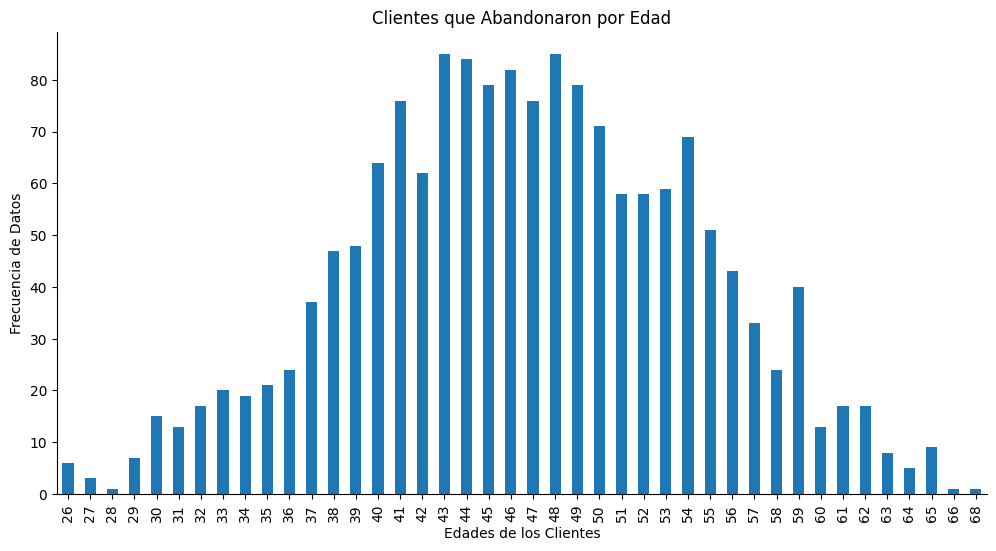

In [32]:
df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'].value_counts().sort_index().plot.bar(figsize=(12,6))
plt.title('Clientes que Abandonaron por Edad')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Edades de los Clientes')
plt.ylabel('Frecuencia de Datos')
plt.show()



---



¿HAY ALGUNA DIFERENCIA SOBRESALIENTE EN EL GÉNERO QUE PUEDA ESTAR RELACIONADA A LA DESERCIÓN?

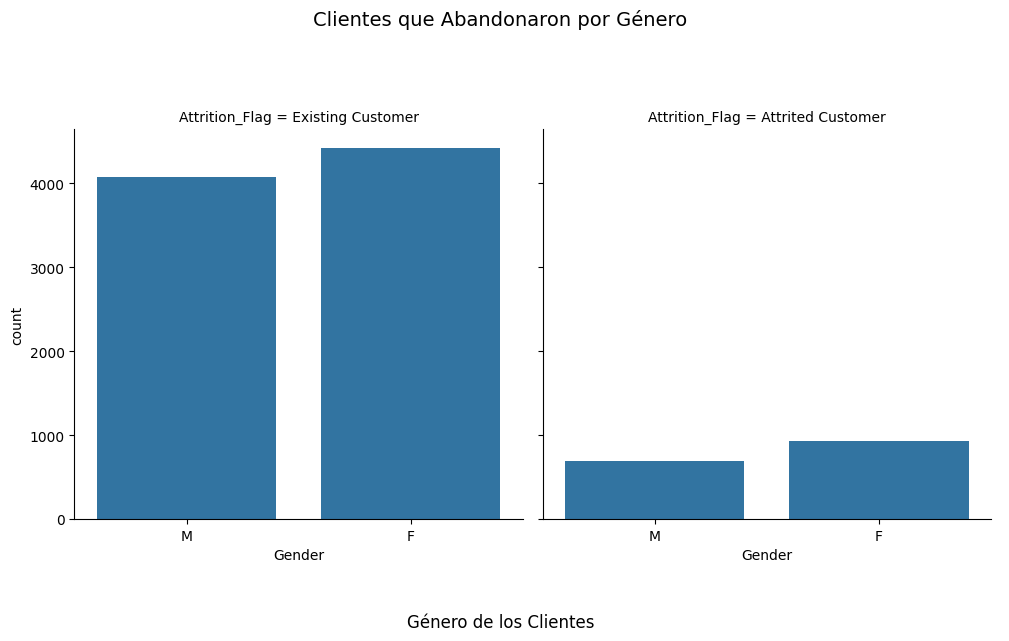

In [33]:
# Desired total dimensions
total_width, total_height = 10, 6
num_subplots = 2  # This is typically the number of unique categories in 'Attrition_Flag'

# Calculate the height of each subplot and the aspect ratio
subplot_height = total_height  # We use the total height for each subplot
aspect = (total_width / num_subplots) / subplot_height

# Create the catplot with calculated aspect and height
g = sns.catplot(x='Gender', col='Attrition_Flag', data=df,
                kind='count', height=subplot_height, aspect=aspect)

# Set super title
g.fig.suptitle('Clientes que Abandonaron por Género', fontsize=14, y=1.05)

# Customize x-label position and appearance
g.fig.text(0.5, 0.02, 'Género de los Clientes', ha='center', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.20)

plt.show()



---



¿CÓMO AFECTA EL NIVEL DE EDUCACIÓN DEL CLIENTE A LAS TASAS DE DESERCIÓN?

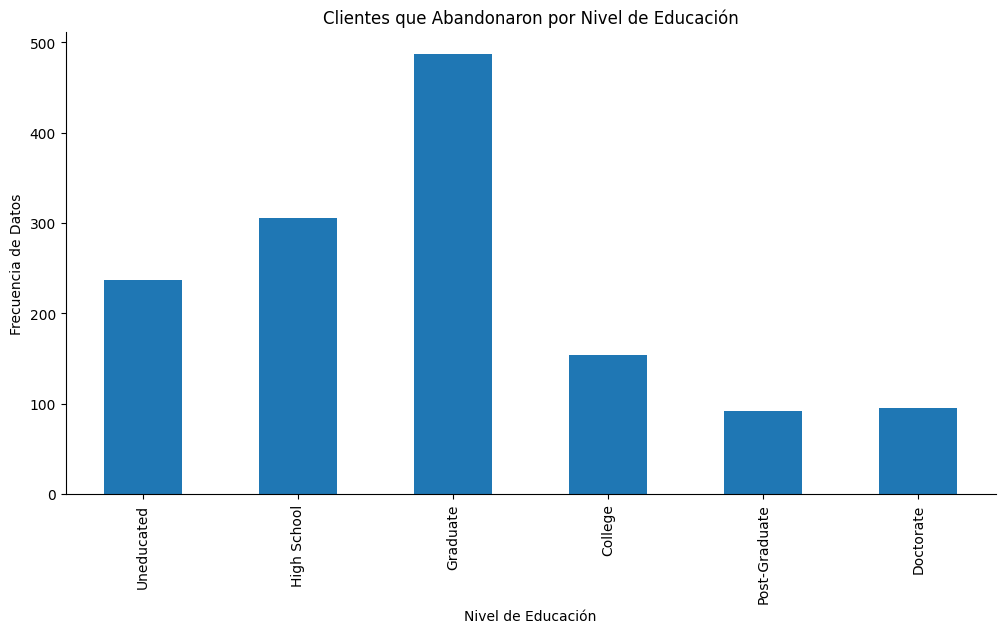

In [34]:
education_order = ["Uneducated", "High School", "Graduate", "College", "Post-Graduate","Doctorate"]
df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts().reindex(education_order).plot.bar(figsize=(12,6))
plt.title('Clientes que Abandonaron por Nivel de Educación')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia de Datos')
plt.show()



---



¿AFECTA EL ESTADO CIVIL DEL CLIENTE A LAS TASAS DE DESERCIÓN?

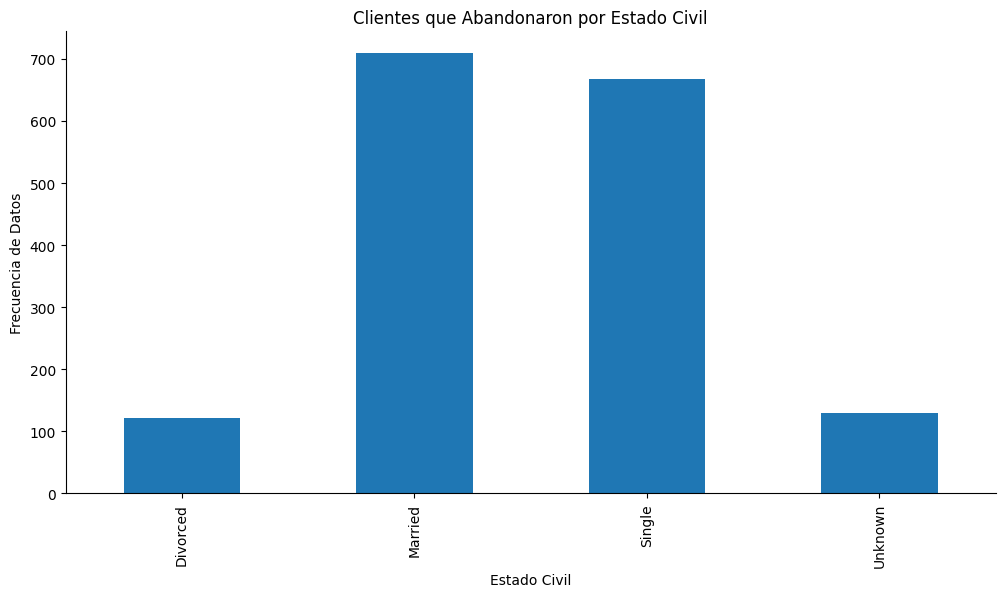

In [35]:
df[df['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'].value_counts().sort_index().plot.bar(figsize=(12,6))
plt.title('Clientes que Abandonaron por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia de Datos')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()



---



¿CÓMO AFECTA EL NIVEL DE INGRESOS DEL CLIENTE A LAS TASAS DE DESERCIÓN?

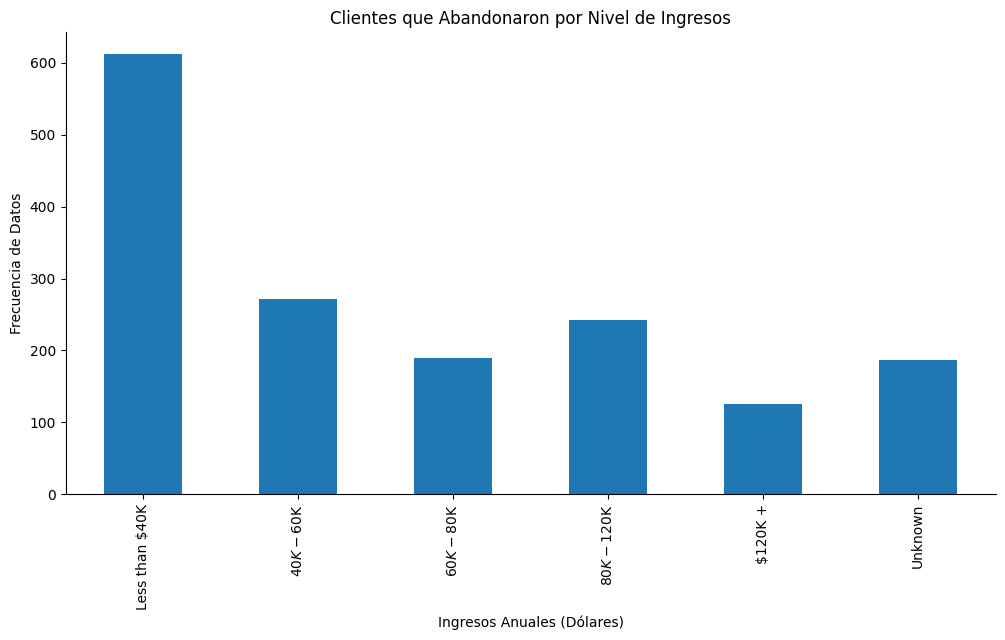

In [36]:
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +","Unknown"]
df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].value_counts()\
.reindex(income_order).plot.bar(figsize=(12,6))
plt.title('Clientes que Abandonaron por Nivel de Ingresos')
plt.xlabel('Ingresos Anuales (Dólares)')
plt.ylabel('Frecuencia de Datos')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()



---



¿TIENE ALGUNA RELEVANCIA EL GÉNERO EN EL LÍMITE DE CRÉDITO?

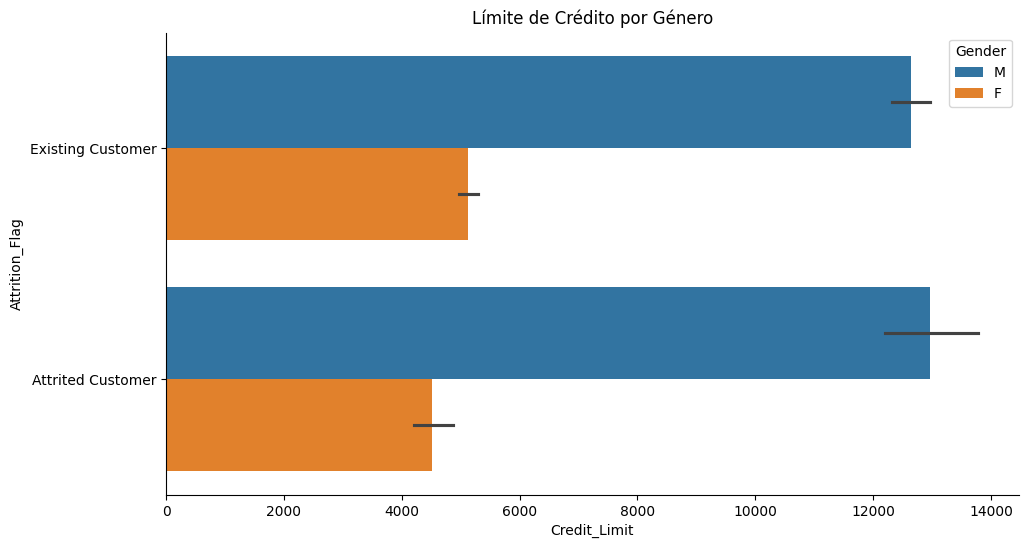

In [37]:
plt.figure(figsize=(11,6))
sns.barplot(data=df, x='Credit_Limit',y=df['Attrition_Flag'], hue = 'Gender').set(title = 'Límite de Crédito por Género')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

## **ANÁLISIS BIVARIADO**

¿CÓMO AFECTA TOTAL_TRANS_CT A LAS TASAS DE DESERCIÓN?

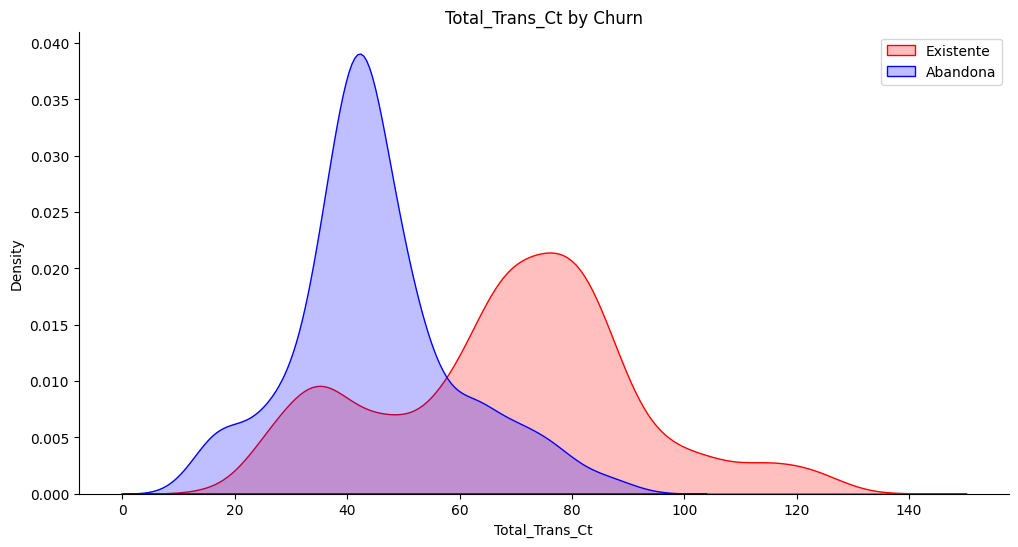

In [38]:
plt.figure(figsize=(12,6))
Amt = sns.kdeplot(df.Total_Trans_Ct[(df['Attrition_Flag']=='Existing Customer')], color = 'Red', fill=True)
Amt = sns.kdeplot(df.Total_Trans_Ct[(df['Attrition_Flag']=='Attrited Customer')],  color = 'Blue',fill=True)

Amt.legend(['Existente', 'Abandona'], loc='upper right')
Amt.set_ylabel('Density')
Amt.set_xlabel('Total_Trans_Ct')
Amt.set_title('Total_Trans_Ct by Churn')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



---



¿CÓMO AFECTA TOTAL_TRANS_AMT A LAS TASAS DE DESERCIÓN?

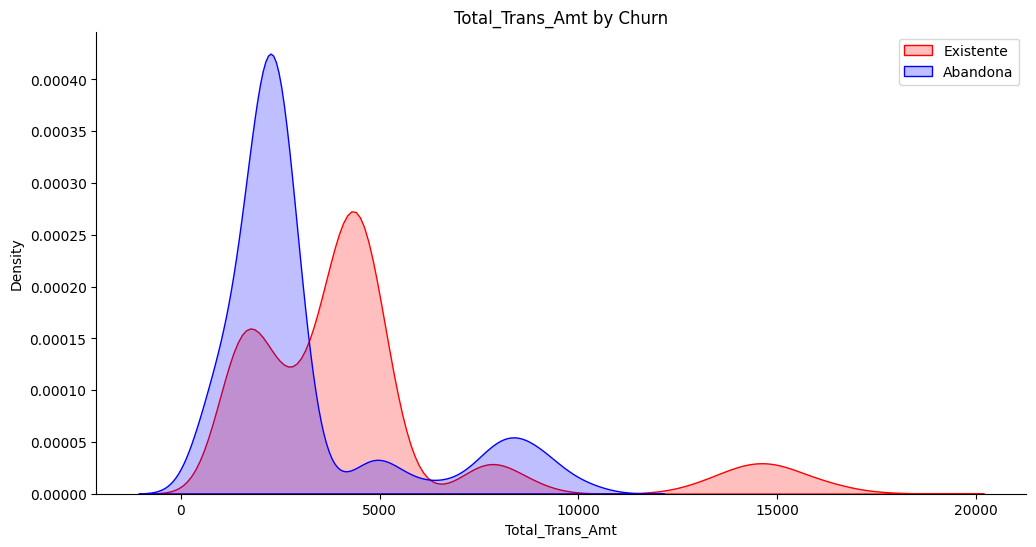

In [39]:
plt.figure(figsize=(12,6))
trans_amt = sns.kdeplot(df.Total_Trans_Amt[(df['Attrition_Flag']=='Existing Customer')], color = 'Red', fill=True)
trans_amt = sns.kdeplot(df.Total_Trans_Amt[(df['Attrition_Flag']=='Attrited Customer')],  color = 'Blue',fill=True)

trans_amt.legend(['Existente', 'Abandona'], loc='upper right')
trans_amt.set_ylabel('Density')
trans_amt.set_xlabel('Total_Trans_Amt')
trans_amt.set_title('Total_Trans_Amt by Churn')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



---



¿CÓMO AFECTA CONTACTS_COUNT_12_MON A LAS TASAS DE DESERCIÓN?

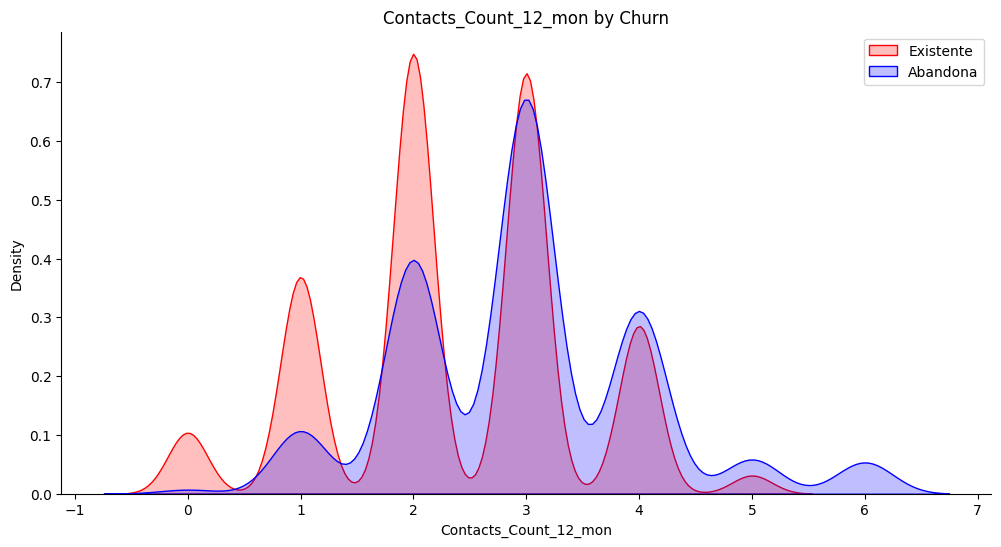

In [40]:
plt.figure(figsize=(12,6))
trans_amt = sns.kdeplot(df.Contacts_Count_12_mon[(df['Attrition_Flag']=='Existing Customer')], color = 'Red', fill=True)
trans_amt = sns.kdeplot(df.Contacts_Count_12_mon[(df['Attrition_Flag']=='Attrited Customer')],  color = 'Blue',fill=True)

trans_amt.legend(['Existente', 'Abandona'], loc='upper right')
trans_amt.set_ylabel('Density')
trans_amt.set_xlabel('Contacts_Count_12_mon')
trans_amt.set_title('Contacts_Count_12_mon by Churn')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



---



In [41]:
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True)

In [42]:
df['Attrition_Flag'].corr(df['Contacts_Count_12_mon'])

0.20449050998160426

# CREAR DATAFRAME ALTERNATIVO PARA VER CORRELACIONES

In [43]:
df2 = df.copy()

In [44]:
#Identificar variables numéricas
numerico = [col for col in df2.columns if df2[col].dtypes != 'O']
numerico

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [45]:
#Identificar variables categóricas
categorico = [col for col in df2.columns if df2[col].dtypes == 'O']
categorico

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [46]:
#Aplicar Encoding a las variables categóricas temporales
df2 = pd.get_dummies(df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Avg_Open_To_Buy                 10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct                  

In [47]:
df2.corr()['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag                    1.000000
Contacts_Count_12_mon             0.204491
Months_Inactive_12_mon            0.152449
Gender_F                          0.037272
Education_Level_Doctorate         0.029386
Income_Category_Less than $40K    0.022466
Marital_Status_Single             0.019037
Dependent_count                   0.018991
Customer_Age                      0.018203
Months_on_book                    0.013687
Education_Level_Post-Graduate     0.011127
Card_Category_Platinum            0.010823
Income_Category_$120K +           0.009584
Education_Level_Unknown           0.009005
Marital_Status_Unknown            0.008904
Income_Category_Unknown           0.007179
Card_Category_Gold                0.005973
Card_Category_Blue                0.003216
Marital_Status_Divorced           0.000850
Avg_Open_To_Buy                  -0.000285
Education_Level_Uneducated       -0.001444
Income_Category_$80K - $120K     -0.003459
Education_Level_College          -0.007840
Card_Catego

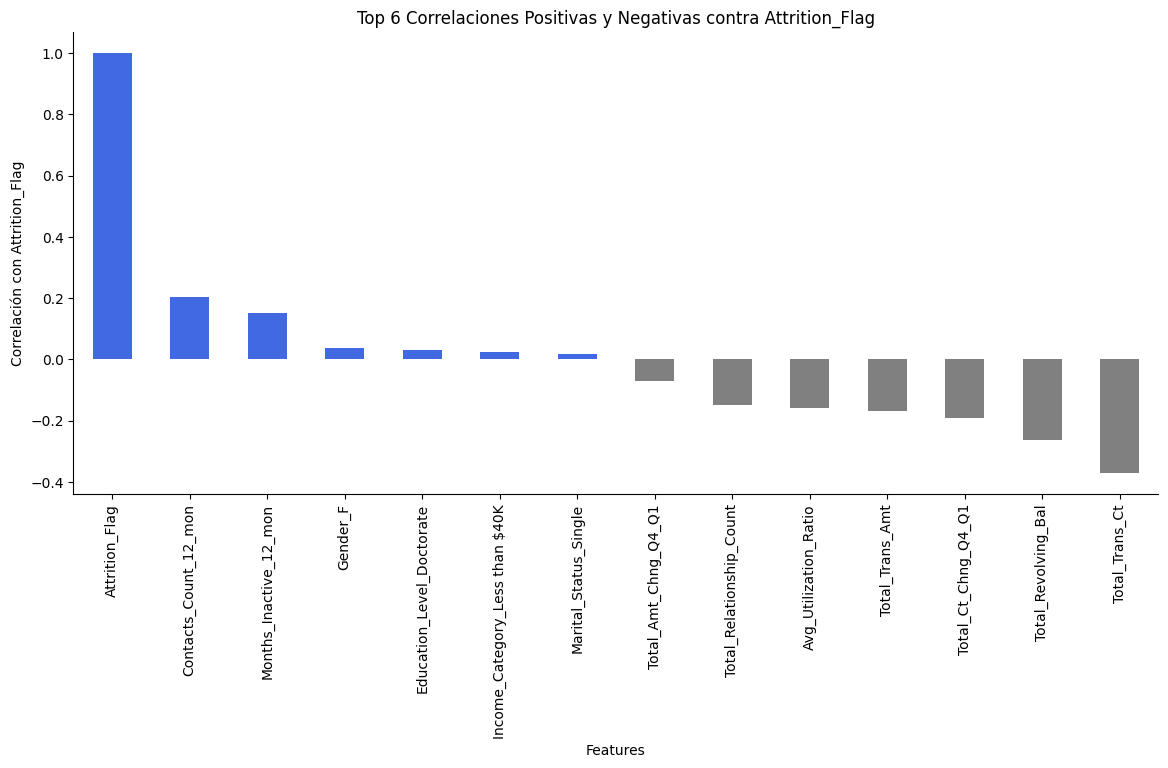

In [48]:
# Sort the correlation values in descending order
sorted_corr = df2.corr()['Attrition_Flag'].sort_values(ascending=False)

# Select the first 6 positive and last 6 negative features
top_positive_features = sorted_corr.head(7).index.tolist()
top_negative_features = sorted_corr.tail(7).index.tolist()
selected_features = top_positive_features + top_negative_features

# Filter the DataFrame to include only the selected features
selected_df = df2[selected_features]

# Create a color mapping
#colors = ['blue'] * len(top_positive_features) + ['gray'] * len(top_negative_features)
colors = ['#4169E1'] * len(top_positive_features) + ['gray'] * len(top_negative_features)

# Create a bar plot
plt.figure(figsize=(14, 6))
selected_df.corr()['Attrition_Flag'][selected_features].plot.bar(color=colors)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlación con Attrition_Flag')
plt.title('Top 6 Correlaciones Positivas y Negativas contra Attrition_Flag')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the plot
plt.show()


# PREPROCESAMIENTO

In [49]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

ELECIÓN DE VARIABLES: FEATURE ENGINEERING

In [50]:
quedar = ['Contacts_Count_12_mon', 'Months_Inactive_12_mon','Total_Revolving_Bal',
          'Total_Trans_Ct','Attrition_Flag','Gender','Marital_Status','Income_Category','Education_Level']

In [51]:
df_prueba = df[quedar]
df_prueba.head()

,Contacts_Count_12_mon,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Attrition_Flag,Gender,Marital_Status,Income_Category,Education_Level
0,3,1,777,42,0,M,Married,$60K - $80K,High School
1,2,1,864,33,0,F,Single,Less than $40K,Graduate
2,0,1,0,20,0,M,Married,$80K - $120K,Graduate
3,1,4,2517,20,0,F,Unknown,Less than $40K,High School
4,0,1,0,28,0,M,Married,$60K - $80K,Uneducated


In [52]:
X = df_prueba.drop(labels='Attrition_Flag', axis=1)
y = df_prueba['Attrition_Flag']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

DIVISIÓN SET DE ENTRENAMIENTO Y SET DE PRUEBA

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=84)

In [55]:
#Aplicando ENCODING sobre las variables categóricas que fueron elegidas
X_train = pd.get_dummies(X_train)
X_train = X_train.values.astype(float)#transformado en Numpy Array y FLOAT para mejor desempeño en Machine Learning
X_test = pd.get_dummies(X_test)
X_test = X_test.values.astype(float)#transformado en Numpy Array y FLOAT para mejor desempeño en Machine Learning

In [56]:
type(X_train)

numpy.ndarray

In [57]:
type(X_test)

numpy.ndarray

BALANCEANDO EL SET DE DATOS CON SMOTE

In [58]:
method = SMOTE(random_state=84)

In [59]:
X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)

In [60]:
X_train_resampled.shape

(13598, 23)

In [61]:
y_train_resampled.shape

(13598,)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ENTRENANDO MODELO DE MACHINE LEARNING

BÚSQUEDA DE MEJORES PARÁMETROS PARA XGBOOST

In [63]:
SEED = 84

In [64]:
xgb = XGBClassifier()

DEFINIENDO PARÁMETROS PARA GRIDSEARCH_CV

In [65]:
params_xgb = {'max_depth': [4,5], #Intenté con más parámetros pero traté de nivelar los resultados de Cross Validation
              'learning_rate': [0.0001 , 0.1],  #Intenté con más parámetros pero traté de nivelar los resultados de Cross Validation
              'colsample_bytree': [0.77, 0.88],  # Similar a subsample
              'colsample_bylevel': [0.5, 0.7],
              'n_estimators': np.arange(100, 150, 10),  # XGBoost es más rápido ajustar de manera adecuada
              'gamma': [0, 0.1],
              'random_state': [SEED]}

In [66]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, scoring='f1', n_jobs=-1)

In [67]:
grid_xgb.fit(X_train_scaled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5, 0.7],
                         'colsample_bytree': [0.77, 0.88], 'gamma': [0, 0.1],
                         'learning_rate': [0.0001, 0.1], 'max_depth': [4, 5],
                         'n_estimators': array([100, 110, 120, 130, 140]),
                         'random_state': [84]},
             scoring='f1')

In [68]:
best_p = grid_xgb.best_params_

In [69]:
best_score = grid_xgb.best_score_

In [70]:
print(f'Best parameters: {best_p} and best score: {best_score}')

Best parameters: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.77, 'gamma': 0, 'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 120, 'random_state': 84} and best score: 0.9073838843357288


IMPLEMENTACIÓN DEL MODELO: XGBOOST CLASSIFIER

In [71]:
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.0001,
    colsample_bytree=0.77,
    colsample_bylevel=0.7,
    n_estimators=140,
    gamma=0.1,
    random_state=SEED
)

In [72]:
xgb.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.77, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=84, ...)

In [73]:
y_pred = xgb.predict(X_test_scaled)

IMPRIMIENDO COMPARACIÓN DE PUNTAJES

In [74]:
print(xgb.score(X_test_scaled, y_test))

0.8642645607107601


In [75]:
y_proba = xgb.predict_proba(X_test_scaled)

IMPRESIÓN DE ROC AUC: VALOR DE PREDICCIÓN CLASE "1" DE LA VARIABLE OBJETIVO

In [76]:
auc = roc_auc_score(y_test, y_proba[:, 1])
print(f'Puntaje AUC: {auc}')

Puntaje AUC: 0.9112657712657712


REPORTE DE CLASIFICACIÓN

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1701
           1       0.56      0.73      0.63       325

    accuracy                           0.86      2026
   macro avg       0.75      0.81      0.77      2026
weighted avg       0.88      0.86      0.87      2026



APLICANDO STRATIFIED K-FOLD CROSS VALIDATION SOBRE XGBOOST CLASSIFIER

In [78]:
MSE_CV = cross_val_score(xgb, X_train_scaled, y_train_resampled,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED), scoring='neg_mean_squared_error', n_jobs=-1)

In [79]:
print("CV MSE: {:.2f}".format(MSE_CV.mean()*-1))

CV MSE: 0.09


In [80]:
print("Train MSE: {:.2f}".format(MSE(y_train_resampled, xgb.predict(X_train_scaled))))

Train MSE: 0.09


In [81]:
print("Test MSE: {:.2f}".format(MSE(y_test, y_pred)))

Test MSE: 0.14
